# 계약서 약관 유/불리 조항 판단 모델 개발
### 빅데이터융합학과 215083 박재석

python = 3.7

torch =1.10.1

GPU: A5000

---

## 1. 개요
    이 프로젝트는 AI Hub에서 수집한 1만건 이상의 약관 데이터를 활용하여 계약서 약관의 유불리 조항을 판단하는 모델을 개발하는 것이다. 수집된 데이터는 각 조항의 위법성과 유리/불리 여부가 라벨링되어 있으며, 이를 학습하여 클라이언트가 제공한 계약서 약관의 유불리 판단을 지원하는 서비스의 핵심 기능을 구현한다.
### 1-1. 제작 배경
    최근 온라인 거래와 전자계약이 증가하면서 일반 소비자들이 복잡한 계약서와 약관을 검토해야 하는 상황이 늘어나고 있다. 통계청에 따르면 2023년 온라인 쇼핑 거래액이 전년 대비 8.1% 증가한 201조원을 기록했으며, 전자계약 시장 규모도 연평균 20% 이상 성장하고 있다. 하지만 법률 전문가가 아닌 일반인들은 계약 조항의 유불리를 판단하기 어려워 불공정한 계약을 체결할 위험이 있다. 실제로 한국소비자원의 조사에 따르면 2022년 전자상거래 관련 소비자 피해 상담이 약 5만 건에 달했으며, 그 중 40% 이상이 불공정 약관으로 인한 피해였다. 이러한 문제를 해결하기 위해 AI 기술을 활용하여 계약서 약관의 유불리를 자동으로 판단해주는 서비스의 필요성이 대두되었다. 
### 1-2. 서비스의 적절성
    - 본 서비스는 자연어처리(NLP) 기술의 발전으로 텍스트 분류와 의미 분석이 고도화되어 계약서 조항 분석에 적합하며, BERT/GPT 등의 사전학습 모델을 통해 법률 문서의 맥락과 의미를 정확하게 파악할 수 있다. 또한 딥러닝 기반 분류 모델로 새로운 계약서 조항에 대한 일관된 판단 기준을 제시하고, KoBERT/KoGPT 등 한국어 특화 언어모델을 활용하여 국내 계약서 분석에 최적화된 성능을 구현하며, 지속적인 학습을 통해 모델 성능을 개선하고 새로운 계약 유형에 대한 적응력을 확보할 수 있다.

    - 본 서비스는 일반 소비자들의 법률 전문성 부족으로 인한 불공정 계약 체결 위험을 해소하고 시간과 비용을 절감할 수 있으며, 자연어 처리 AI 기술을 활용한 자동화된 분석으로 기업의 법무 업무 효율성을 높일 수 있다. 또한 기존 법률 자문 서비스 대비 높은 접근성과 비용 효율성으로 중소기업과 개인 사업자들도 부담 없이 활용할 수 있고 24시간 실시간 분석이 가능하여 신속한 의사결정을 지원하며, 축적된 데이터를 바탕으로 업종별/계약 유형별 특화 서비스로 발전할 수 있는 확장성을 갖추고 있어 전자상거래가 급증하는 현 시점에서 소비자 권익 보호와 공정한 계약 문화 정착에 기여할 것으로 기대된다.     
--- 

## 2. 문제 정의 


## 3. 데이터 수집
AI Hub에서 제공하는 ["법률/규정 (판결서, 약관 등) 텍스트 분석 데이터"](https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&dataSetSn=580) 를 활용하여 데이터를 수집하였다. 

    이 데이터셋은 1만 건 이상의 약관 조항에 대해 위법성 여부와 소비자 입장에서의 유·불리를 판단하고, 그 판단 근거를 태깅 및 라벨링한 약관 분석 데이터로 구성되어 있다. 본 프로젝트에서는 약관 조항 분석 데이터만을 활용하여 계약서 약관의 유불리를 판단하는 모델을 개발한다. 각 약관 조항은 JSON 형식으로 저장되어 있으며, 조항의 내용과 함께 위법성(ftcCnclsns) 및 유불리 여부(dvAntageous)가 라벨링되어 있어 법률 텍스트를 체계적으로 분석할 수 있는 데이터셋이 구축되었다. 데이터셋은 학습(train)용 8,000건과 검증(validation)용 1,000건으로 분할되어 있다.


### 3-1. 탐색적 자료 분석

In [47]:
# 라이브러리 임포트
import json
import pandas as pd

# JSON 파일 경로 설정
# 유리한 조항 예시 데이터 경로
advs_ex_path = './train/01.유리/001_개인정보취급방침_가공.json'
# 불리한 조항 예시 데이터 경로
dis_ex_path = './train/02.불리/001_가맹계약_가공.json'

# JSON 파일 읽기
with open(advs_ex_path, 'r', encoding='utf-8') as f:
    advs_ex = json.load(f)
with open(dis_ex_path, 'r', encoding='utf-8') as f:
    dis_ex = json.load(f)

# JSON 구조 확인
print("=== 유리한 조항 데이터 구조 ===")
print(json.dumps(advs_ex, indent=2, ensure_ascii=False))
print("\n=== 불리한 조항 데이터 구조 ===") 
print(json.dumps(dis_ex, indent=2, ensure_ascii=False))

# DataFrame으로 변환하기 전에 구조 파악
print("\n=== 키(key) 목록 ===")
print("유리한 조항:", list(advs_ex.keys()))
print("불리한 조항:", list(dis_ex.keys()))



=== 유리한 조항 데이터 구조 ===
{
  "clauseField": "24",
  "ftcCnclsns": "2",
  "clauseArticle": [
    "제2조(개인정보의 처리 및 보유기간) \n① 협회는 법령에 따른 개인정보 보유․이용기간 또는 정보주체로부터 개인정보를 수집시에 동의받은 개인정보 보유,이용기간 내에서 개인정보를 처리,보유합니다."
  ],
  "dvAntageous": "1",
  "comProvision": [
    "제2조(개인정보의 처리 및 보유기간) ① ＜개인정보처리자명＞은(는) 법령에 따른 개인정보 보유•이용기간 또는 정보주체로부터 개인정보를 수집 시에 동의받은 개인정보 보유•이용기간 내에서 개인정보를 처리•보유합니다."
  ]
}

=== 불리한 조항 데이터 구조 ===
{
  "clauseField": "1",
  "ftcCnclsns": "1",
  "clauseArticle": [
    "배송비용 부담조항                                                                                          \n(1) 약관조항가맹점관리규정 ⅳ. 반품처리규정. 4-1-1. 가맹점 업무지침\n라. 불량 입고시 배송비용은 가맹점이 부담하는 것을 원칙으로 한다."
  ],
  "dvAntageous": "2",
  "illdcssBasiss": [
    "매매물건에 하자가 있는 경우 매수인은 매도인에게 하자없는 물건을 청구할 수 있고, 매도인은 완전물로 급부하여야 하며, 물건인도에 소요되는 비용은 하자있는 목적물을 인도한 매도인이 부담하는 것이 신의칙에 합당하다.",
    "불량제품 교환시 소요되는 배송비용을 가맹점에 부담시키는 것은 가맹점에 부당하게 불리한 조항이다."
  ],
  "relateLaword": [
    "제6조(일반원칙)\n② 약관의 내용 중 다음 각 호의 어느 하나에 해당하는 내용을 정하고 있는 조항은 공정성을 잃은 것으로 추정된다.\n

clauseField는 약관 분야, ftcConclsns는 공정위 심결 례(1: 해당, 2: 비해당), clauseArticle는 조항 내용, dvAntageous는 유불리 여부(1: 유리, 2: 불리), comProvision은 비교근거 ,illdcssBasiss는 위법성 판단 근거, relateLaword는 관련 법령, unfavorableProvision는 불리한 조항 유형(1: 신의성실의 원픽위반, 2: 개별금지 조항의 위반) 이다.

조항(text)가 입력되어 유뷸리 판단(binary)를 출력해야하므로 데이터셋에서 "clauseArticle" 키와 "dvAntageous" 키를 추출하여 데이터프레임으로 변환한다.

In [48]:

import glob  # 파일 경로 처리를 위한 라이브러리

# 데이터프레임을 저장할 빈 리스트 생성
train_list = []  # 학습 데이터를 저장할 리스트 
test_list = []   # 검증 데이터를 저장할 리스트

# 학습 데이터 처리 (train 폴더)
# 유리한 조항 파일 처리
train_adv_files = glob.glob('./train/01.유리/*.json')
for file in train_adv_files:
    with open(file, 'r') as f:
        data = json.load(f)
        row_dict = {
            '약관 분야': data['clauseField'],
            '조항 내용': data['clauseArticle'], 
            '유불리여부': data['dvAntageous']
        }
        train_list.append(row_dict)

# 불리한 조항 파일 처리
train_dis_files = glob.glob('./train/02.불리/*.json')
for file in train_dis_files:
    with open(file, 'r') as f:
        data = json.load(f)
        row_dict = {
            '약관 분야': data['clauseField'],
            '조항 내용': data['clauseArticle'],
            '유불리여부': data['dvAntageous']
        }
        train_list.append(row_dict)

# 검증 데이터 처리 (vali 폴더)
# 유리한 조항 파일 처리  
test_adv_files = glob.glob('./vali/01.유리/*.json')
for file in test_adv_files:
    with open(file, 'r') as f:
        data = json.load(f)
        row_dict = {
            '약관 분야': data['clauseField'],
            '조항 내용': data['clauseArticle'],
            '유불리여부': data['dvAntageous']
        }
        test_list.append(row_dict)

# 불리한 조항 파일 처리
test_dis_files = glob.glob('./vali/02.불리/*.json')
for file in test_dis_files:
    with open(file, 'r') as f:
        data = json.load(f)
        row_dict = {
            '약관 분야': data['clauseField'],
            '조항 내용': data['clauseArticle'],
            '유불리여부': data['dvAntageous']
        }
        test_list.append(row_dict)

# 리스트를 데이터프레임으로 변환
traindf = pd.DataFrame(train_list)  # 학습용 데이터프레임
testdf = pd.DataFrame(test_list)    # 검증용 데이터프레임

# 유불리 여부 레이블 변환 (1,2 -> 0,1)
traindf['유불리여부'] = traindf['유불리여부'].astype(int) - 1  # 1->0, 2->1로 변환
testdf['유불리여부'] = testdf['유불리여부'].astype(int) - 1    # 1->0, 2->1로 변환

# 결과 확인
print("학습 데이터 크기:", traindf.shape)
print("검증 데이터 크기:", testdf.shape)

print("\n=== 학습 데이터 ===")
print(traindf.head())
print("\n=== 검증 데이터  ===")
print(testdf.head())




학습 데이터 크기: (8000, 3)
검증 데이터 크기: (1000, 3)

=== 학습 데이터 ===
  약관 분야                                              조항 내용  유불리여부
0    37  [제12조(회원탈퇴 및 자격 상실 등)\n④ 회사가 회원자격을 상실시키는 경우에는 ...      0
1    43  [제2조(계약당사자, 차량가격의 변동)\n④ 을은 제2항, 제3항에 따라 갑의 통지...      0
2    40  [제25조(책임의 특별소멸 사유와 시효)\n① 운송물의 일부 멸실 또는 훼손에 대한...      0
3    30  [제11조 보증채무이행 청구시기\n2. 계속하여 11월이상 영업을 하지 아니하거나 ...      0
4    14  [제34조(해지환급금) \n② 해지환급금의 지급사유가 발생한 경우 계약자는 회사에 ...      0

=== 검증 데이터  ===
  약관 분야                                              조항 내용  유불리여부
0    33  [제11조 (단체계약과 상조서비스)\n① 법인 또는 단체의 대표가 구성원들을 위하여...      0
1    25  [제3조 (회사정보 등의 제공)\n회사는 다음 각 호의 사항을 회원이 알아보기 쉽도...      0
2    32  [제9조 (입실 후 계약의 해지)\n① 이용자는 입실 후에 사업자의 책임 있는 사유...      0
3    31  [제7조(회원 탈퇴 및 자격 상실 등)\n③ 몰이 회원 자격을 제한, 정지 시킨 후...      0
4    32  [제11조 (이용자의 의무)\n① 이용자는 입실하는 때에 산모와 신생아의 건강 상태...      0


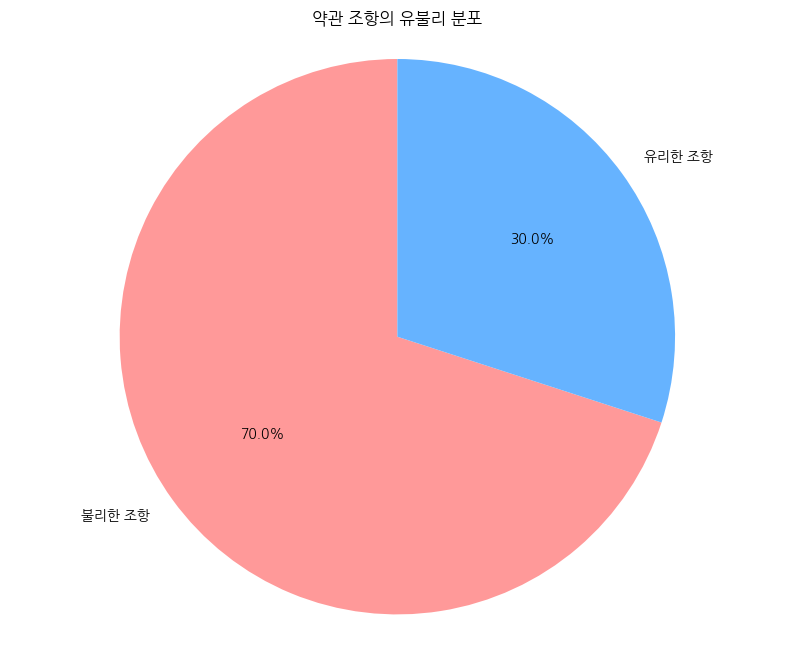

In [49]:
import matplotlib.pyplot as plt
# 유불리 비율 계산 및 파이차트 시각화
# 1: 불리한 조항, 2: 유리한 조항
plt.rcParams['font.family'] = 'NanumGothic'
unfavorable = len(traindf[traindf['유불리여부'] == 0])  # 불리한 조항 수 
favorable = len(traindf[traindf['유불리여부'] == 1])    # 유리한 조항 수

# 파이차트 데이터 준비
labels = ['불리한 조항', '유리한 조항']
sizes = [unfavorable, favorable]
colors = ['#ff9999', '#66b3ff']

# 파이차트 생성
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 원형으로 보이게 설정
plt.title('약관 조항의 유불리 분포')

plt.show()


학습 데이터를 동일한 비율로 맞춰준다. 

In [50]:
import numpy as np

print("=== 리샘플링 전 데이터 분포 ===")
print("유리한 조항:", favorable)
print("불리한 조항:", unfavorable)

# 불리한 데이터에서 유리한 데이터 개수만큼 랜덤 추출
unfavorable_indices = traindf[traindf['유불리여부'] == 0].index
sampled_unfavorable_indices = np.random.choice(unfavorable_indices, size=favorable, replace=False)

# 균형잡힌 데이터셋 생성
balanced_unfavorable = traindf.loc[sampled_unfavorable_indices]
favorable = traindf[traindf['유불리여부'] == 1]
balanced_traindf = pd.concat([balanced_unfavorable, favorable])

# 데이터 섞기
balanced_traindf = balanced_traindf.sample(frac=1, random_state=42).reset_index(drop=True)
testdf = testdf.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n=== 리샘플링 후 데이터 분포 ===") 
print(balanced_traindf['유불리여부'].value_counts())


=== 리샘플링 전 데이터 분포 ===
유리한 조항: 2400
불리한 조항: 5600

=== 리샘플링 후 데이터 분포 ===
0    2400
1    2400
Name: 유불리여부, dtype: int64


## 조항 데이터 전처리

In [51]:
# 조항 내용 앞 5개 출력
print("=== 조항 내용 샘플 ===")
for i in range(5):
    print(train_list[i]['조항 내용'])

=== 조항 내용 샘플 ===
['제12조(회원탈퇴 및 자격 상실 등)\n④ 회사가 회원자격을 상실시키는 경우에는 회원등록을 말소합니다. 이 경우 회원에게 이를 통지하고, 회원등록 말소 전에 최소한 75일 이상의 기간을 정하여 소명할 기회를 부여합니다.']
['제2조(계약당사자, 차량가격의 변동)\n④ 을은 제2항, 제3항에 따라 갑의 통지를 받은 후 9일 이내에 이 계약을 해제할 수 있으며 이 경우 갑은 을로부터 이미 지급받은 금액 및 이에 대한 상사법정이율에 의한 이자(갑이 받은 금액 곱하기 갑이 대금을 보유한 일수 나누기 365 곱하기 6 나누기 100)를 을에게 반환하여야 합니다. 이에 추가하여 제3항의 사유로 인한 해제시에는 약정한 위약금 또는 민법 제393조에 따른 손해배상금을 지급합니다. ']
['제25조(책임의 특별소멸 사유와 시효)\n① 운송물의 일부 멸실 또는 훼손에 대한 택배사의 손해배상책임은 고객(수화인)이 운송물을 수령한 날로부터 14일 이내에 그 일부 멸실 또는 훼손에 대한 사실을 고객(송화인)이 택배사에게 통지를 발송하지 아니하면 소멸합니다.', '② 운송물의 일부 멸실, 훼손 또는 연착에 대한 택배사의 손해배상책임은 고객(수화인)이 운송물을 수령한 날로부터 24개월이 경과하면 소멸합니다. 다만, 운송물이 전부 멸실된 경우에는 그 인도예정일로부터 기산합니다.\n③ 제1항과 제2항의 규정은 택배사 또는 그 운송 위탁을 받은 자, 기타 운송을 위하여 관여된 자가 이 운송물의 일부 멸실 또는 훼손의 사실을 알면서 이를 숨기고 운송물을 인도한 경우에는 적용되지 아니합니다. 이 경우에는 택배사의 손해배상책임은 고객(수화인)이 운송물을 수령한 날로부터 5년간 존속합니다.']
['제11조 보증채무이행 청구시기\n2. 계속하여 11월이상 영업을 하지 아니하거나 폐업한 때']
['제34조(해지환급금) \n② 해지환급금의 지급사유가 발생한 경우 계약자는 회사에 해지환급금을 청구하여야 하며, 회사는 청구를 접수한 날부터 1영업일 이내에 해지환급금을 지급

조항 내용애서 "제 @@조", "\n" , 원문자, 번호 리스트 등 불필요한 패턴 제거 한다. 

In [52]:
import re
# 조항 내용에서 불필요한 내용을 없애는 함수 정의
def clean_clause(clause):
    # None 타입 체크 추가
    if clause is None:
        return ""
    # 리스트로 들어온 경우 첫 번째 요소만 사용
    if isinstance(clause, list):
        clause = clause[0]
        
    # 문자열 타입으로 변환
    clause = str(clause)
    
    # 제 @@조, \n, 원문자, 번호 리스트 등 불필요한 패턴 제거
    clause = re.sub(r'제\s*\d+\s*조', '', clause)  # "제 XX조" 패턴 제거 (공백 유연하게)
    clause = re.sub(r'\n', ' ', clause)  # 줄바꿈을 공백으로 대체
    clause = re.sub(r'[①-⑮]', '', clause)  # 원문자(①~⑮) 제거
    clause = re.sub(r'\d+\.\s*', '', clause)  # "숫자." 형태의 번호 리스트 제거
    clause = re.sub(r'\(\d+\)', '', clause)  # "(숫자)" 형태의 번호 제거
    
    # 줄바꿈을 공백으로 대체하고 연속된 공백 제거
    clause = re.sub(r'\s*\n\s*', ' ', clause)  # 줄바꿈과 그 주변 공백을 하나의 공백으로
    clause = re.sub(r'\s+', ' ', clause)  # 연속된 공백을 하나로
    
    return clause.strip()  # 앞뒤 공백 제거

    # 전처리 전후 비교를 위한 출력
print("\n=== 전처리 전후 비교 ===")
for i in range(5):
    print(f"[전처리 전] ")
    print(train_list[i]['조항 내용'])
    print(f"[전처리 후] ")
    print(clean_clause(train_list[i]['조항 내용']))
    print("-"*80)  # 구분선 출력



=== 전처리 전후 비교 ===
[전처리 전] 
['제12조(회원탈퇴 및 자격 상실 등)\n④ 회사가 회원자격을 상실시키는 경우에는 회원등록을 말소합니다. 이 경우 회원에게 이를 통지하고, 회원등록 말소 전에 최소한 75일 이상의 기간을 정하여 소명할 기회를 부여합니다.']
[전처리 후] 
(회원탈퇴 및 자격 상실 등) 회사가 회원자격을 상실시키는 경우에는 회원등록을 말소합니다. 이 경우 회원에게 이를 통지하고, 회원등록 말소 전에 최소한 75일 이상의 기간을 정하여 소명할 기회를 부여합니다.
--------------------------------------------------------------------------------
[전처리 전] 
['제2조(계약당사자, 차량가격의 변동)\n④ 을은 제2항, 제3항에 따라 갑의 통지를 받은 후 9일 이내에 이 계약을 해제할 수 있으며 이 경우 갑은 을로부터 이미 지급받은 금액 및 이에 대한 상사법정이율에 의한 이자(갑이 받은 금액 곱하기 갑이 대금을 보유한 일수 나누기 365 곱하기 6 나누기 100)를 을에게 반환하여야 합니다. 이에 추가하여 제3항의 사유로 인한 해제시에는 약정한 위약금 또는 민법 제393조에 따른 손해배상금을 지급합니다. ']
[전처리 후] 
(계약당사자, 차량가격의 변동) 을은 제2항, 제3항에 따라 갑의 통지를 받은 후 9일 이내에 이 계약을 해제할 수 있으며 이 경우 갑은 을로부터 이미 지급받은 금액 및 이에 대한 상사법정이율에 의한 이자(갑이 받은 금액 곱하기 갑이 대금을 보유한 일수 나누기 365 곱하기 6 나누기 100)를 을에게 반환하여야 합니다. 이에 추가하여 제3항의 사유로 인한 해제시에는 약정한 위약금 또는 민법 에 따른 손해배상금을 지급합니다.
--------------------------------------------------------------------------------
[전처리 전] 
['제25조(책임의 특별소멸 사유와 시효)\n① 운송물의 일부 

In [53]:
# 위 함수를 적용하여 조항 내용 전처리(불필요한 패턴 제거)
balanced_traindf['조항 내용'] = balanced_traindf['조항 내용'].apply(clean_clause)
testdf['조항 내용'] = testdf['조항 내용'].apply(clean_clause)
print(balanced_traindf.head())
print(testdf.head())


  약관 분야                                              조항 내용  유불리여부
0    37  (콘텐츠서비스의 제공 및 중단) 콘텐츠서비스는 연중무휴, 2일 48시간 제공함을 원...      0
1    43  제5항(계약의 해재) 이 계약이 해제되었을 때에는 갑은 을로부터 수납한 매매대금중 ...      1
2     1  (MARKETING) 제2항 을은 갑이 전 매장의 통일화, 고객만족 및 매출 증대 ...      1
3     2  (공급 계약량) 제3항 갑은 을에게 시장여건의 변화에 따라 수송난 타개와 지역별 수...      1
4    31  (회원 탈퇴 및 자격 상실 등) 몰이 회원자격을 상실시키는 경우에는 회원등록을 말소...      0
  약관 분야                                              조항 내용  유불리여부
0     8  (어음의 제시, 교부) 은행이 어음채권의 시효중단을 위하여 독촉을 할 경우에도, 어...      0
1    43  제6항(계약해제) 이 계약이 해제되었을 때에는 갑은 을로부터 납부한 매매대금중 계약...      1
2     8  (담보의 제공 및 관리) 채무자는 다음 각 호의 사유의 하나라도 발생한 경우에는 회...      1
3    33  (단체계약과 상조서비스) 구성원에게 이용권 및 이용서비스를 부여하는 것은 계약에서 ...      0
4     8  (기한전의 채무변제의무) 채무자에게 다음 각 호의 어느 하나에 해당하는 사유가 발생...      0


## KoBERT 모델 활용
## 1. 토큰화

In [54]:
#!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

In [55]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [56]:
# GPU 사용 가능 여부 확인 및 디바이스 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"사용 중인 디바이스: {device}")

사용 중인 디바이스: cuda:0


### KoBERT 모델의 입력 형태인 tsv 형식으로 변환. 

In [57]:
# TSV 데이터 형식으로 변환하는 함수 
def convert_to_tsv_format(df):
    tsv_format = []
    for idx, row in df.iterrows():
        # 텍스트와 레이블 추출
        text = row['조항 내용']
        label = row['유불리여부']
        # (텍스트, 레이블) 튜플 형태로 저장
        tsv_format.append([text, str(label)])
    return tsv_format

# 학습용/테스트용 데이터 TSV 형식으로 변환
train_tsv = convert_to_tsv_format(balanced_traindf)
test_tsv = convert_to_tsv_format(testdf)

# 변환 결과 확인
print("학습 데이터 샘플:")
print(train_tsv[:2])
print("\n테스트 데이터 샘플:")
print(test_tsv[:2])


학습 데이터 샘플:
[['(콘텐츠서비스의 제공 및 중단) 콘텐츠서비스는 연중무휴, 2일 48시간 제공함을 원칙으로 합니다.', '0'], ['제5항(계약의 해재) 이 계약이 해제되었을 때에는 갑은 을로부터 수납한 매매대금중 계약보증금을 공제한금액을 을에게 반환하며 을이 갑에게 지급한 계약보증금은 당연히 갑에게 귀속한다. 이 경우 갑이 을에게 반환하는 금액에는 이자를 부과하지 아니하며 갑에 대한 계약보증금의 귀속은 계약해제로 인하여 갑이 입은 손해에 대한 을의 배상의무를 면제하는 것은 아니다.', '1']]

테스트 데이터 샘플:
[['(어음의 제시, 교부) 은행이 어음채권의 시효중단을 위하여 독촉을 할 경우에도, 어음의 제시를 생략할 수 있습니다.', '0'], ['제6항(계약해제) 이 계약이 해제되었을 때에는 갑은 을로부터 납부한 매매대금중 계약보증금을 공제한 금액을 을에게 반환하며 을이 갑에게 지급한 계약보증금은 당연히 갑에게 귀속한다. 이 경우 갑이 을에게 제 반환하는 금액에는 이자를 추가하지 아니하며 갑에 대한 계약보증금의 귀속은 계약해제로 인하여 갑이 입은 손해에 대한 을의 배상의무를 면제하는 것은 아니다.', '1']]


In [58]:
#bert 모델, vocab 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

using cached model. /home/ubuntu/runyourai/jsworld/PROJECT/.cache/kobert_v1.zip
using cached model. /home/ubuntu/runyourai/jsworld/PROJECT/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


### 토큰화 하여 tensorData로 변환
KoBERT의 입력이 될 수 있도록 데이터를 가공해주어야 한다. KoBERT의 입력 데이터로 만들어주기 위해서는, 토큰화와 패딩, 어텐션 마스크를 만들어주는 과정을 거쳐 torch의 dataloader로 변환시켜 주어야 한다.

BERTDataset 클래스는 tsv dataset과 dataset의 sent_idx, dataset의 label_idx, 버트 토크나이저, max_len, pad와 pair에 대한 bool값을 인자로 받아 토큰화, 패딩을 하고 어텐션 마스크를 만들어 inputs, labels, masks들을 TensorDataset으로 변환한다.

In [59]:
# 토큰화하여 레이블과함께 텐서로 반환하는 class
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

토큰화 시 적절한 최대 길이를 알기 위해 문장 길이 분포 분석을 진행한다.

=== 학습 데이터 문장 길이 통계 ===
평균 길이: 124.97
중앙값: 115.00
최대 길이: 252
최소 길이: 18


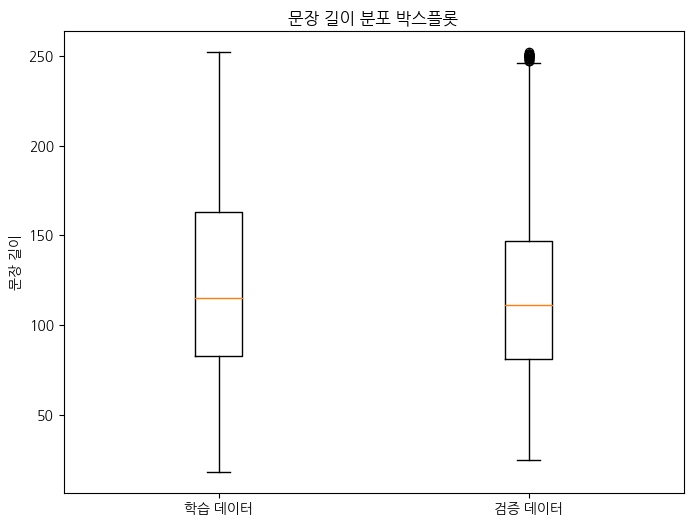


=== 학습 데이터 길이 구간별 분포 ===
0-50        270
51-100     1593
101-150    1466
151-200     902
201-250     553
251-300      16
300+          0
dtype: int64


In [60]:
from collections import Counter

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')

# 문장 길이 계산 함수
def get_text_lengths(texts):
    return [len(str(text)) for text in texts]

# 문장 길이 분포 분석
train_lengths = get_text_lengths(balanced_traindf['조항 내용']) 
test_lengths = get_text_lengths(testdf['조항 내용'])

# 기초 통계량 계산
print("=== 학습 데이터 문장 길이 통계 ===")
print(f"평균 길이: {np.mean(train_lengths):.2f}")
print(f"중앙값: {np.median(train_lengths):.2f}")
print(f"최대 길이: {max(train_lengths)}")
print(f"최소 길이: {min(train_lengths)}")

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot([train_lengths, test_lengths], labels=['학습 데이터', '검증 데이터'])
plt.title('문장 길이 분포 박스플롯')
plt.ylabel('문장 길이')
plt.show()

# 길이 구간별 분포
def get_length_distribution(lengths):
    bins = [0, 50, 100, 150, 200, 250, 300, np.inf]
    labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '300+']
    dist = pd.cut(lengths, bins=bins, labels=labels).value_counts()
    return dist.sort_index()

train_dist = get_length_distribution(train_lengths)
print("\n=== 학습 데이터 길이 구간별 분포 ===")
print(train_dist)

In [61]:
#파라미터 설정
max_len = 150 # 전체 데이터의 약 70%를 커버한다. 
batch_size = 32  
warmup_ratio = 0.1
num_epochs = 7 
max_grad_norm = 1
log_interval = 100  
learning_rate = 1e-6  
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)
#BERTDataset 클래스 이용, TensorDataset으로 만들어주기
data_train = BERTDataset(train_tsv, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(test_tsv, 0, 1, tok, max_len, True, False)


using cached model. /home/ubuntu/runyourai/jsworld/PROJECT/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [62]:
# 변환된 데이터 확인
print(data_train[0])
print(data_test[0])


(array([   2,  522, 4678, 6555, 7095, 4130, 2184, 4261,  517,   40, 4678,
       6555, 5760, 3332, 7295, 6228, 7982,  517,   46,  553, 7126,  610,
       6706, 4130, 7841, 3543, 7078, 4986,  517,   54,    3,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1], 

## KoBERT 모델 활용
## 2. 분류기 학습

In [63]:
#배치 및 데이터로더 설정
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=4)

### 분류 모델 정의
---
1. 토큰화된 입력(token_ids), 유효 길이(valid_length), 세그먼트 정보(segment_ids)입력
2. gen_attention_mask 함수를 통해 유효 길이에 따른 어텐션 마스크가 생성
3. BERT 모델이 이 입력들을 처리하여 pooler 출력.
4. 설정된 경우 dropout이 pooler 출력에 적용.

[분류기]
1. 768차원 → 384차원으로 선형 변환
2. ReLU 활성화 함수 적용
3. Dropout 적용
4. 384차원 → num_classes 차원으로 최종 분류
5. 최종적으로 클래스 확률값이 출력

In [64]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size//2),
            nn.ReLU(),
            nn.Dropout(p=dr_rate),
            nn.Linear(hidden_size//2, num_classes)
        )
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [65]:
model = BERTClassifier(bertmodel, dr_rate=0.4).to(device)

### 학습을 위한 옵티마이저, 스케줄러설정
---
[가중치 감쇠(weight decay) 설정]

- bias와 LayerNorm.weight를 제외한 파라미터는 0.02의 가중치 감쇠 적용
- bias와 LayerNorm.weight는 가중치 감쇠를 적용하지 않음

[학습 설정]
- AdamW 옵티마이저 사용
- CrossEntropyLoss를 손실 함수로 사용
- Cosine 스케줄링과 웜업을 결합한 학습률 조정 방식 적용

전체 학습 스텝과 웜업 비율을 고려하여 학습률을 동적으로 조절하는 구조

In [66]:
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.02},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

정확도를 위한 함수 정의

In [67]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

### 학습 진행
---
에폭이 끝날 때마다 평균loss와 정확도를 기록한다.

In [68]:
# 학습 진행 상황을 저장할 리스트 초기화
train_losses = []  # 학습 손실값 저장 (배치별)
train_accs = []   # 학습 정확도 저장 (배치별)
val_accs = []     # 검증 정확도 저장 (에폭별)

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    epoch_loss = 0.0
    model.train()
    
    # 학습 데이터로더에서 배치 단위로 데이터를 가져와 학습을 진행
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
        # 이전 배치에서 계산된 그래디언트를 초기화
        optimizer.zero_grad()
        # 데이터를 GPU로 이동하고 적절한 형식으로 변환
        token_ids = token_ids.long().to(device)      # 토큰 ID를 long 타입으로 변환
        segment_ids = segment_ids.long().to(device)  # 세그먼트 ID를 long 타입으로 변환
        valid_length= valid_length                   # 유효 길이 정보
        label = label.long().to(device)             # 레이블을 long 타입으로 변환
        # 모델에 입력하여 예측값 계산
        out = model(token_ids, valid_length, segment_ids)
        # 손실 함수를 통해 손실값 계산
        loss = loss_fn(out, label)
        # 역전파를 통한 그래디언트 계산
        loss.backward()
        # 그래디언트 클리핑으로 기울기 폭주 방지
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        # 옵티마이저를 통한 모델 파라미터 업데이트
        optimizer.step()
        # 학습률 스케줄러 업데이트
        scheduler.step()
        # 현재 배치의 정확도 계산
        epoch_loss += loss.data.cpu().numpy()
        batch_acc = calc_accuracy(out, label)
        train_acc += batch_acc

        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    # 한 에폭이 끝난 이후 에폭의 평균 손실값과 정확도를 리스트에 추가
    epoch_train_acc = train_acc / (batch_id+1)
    epoch_loss = epoch_loss / (batch_id+1)
    train_losses.append(epoch_loss)
    train_accs.append(epoch_train_acc)
    epoch_train_acc = train_acc / (batch_id+1)
    print("epoch {} train acc {}".format(e+1, epoch_train_acc))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    
    # 에폭별 검증 정확도 저장
    epoch_val_acc = test_acc / (batch_id+1)
    val_accs.append(epoch_val_acc)
    print("epoch {} validation acc {}".format(e+1, epoch_val_acc))

  0%|          | 0/150 [00:00<?, ?it/s]

  1%|          | 1/150 [00:00<01:25,  1.75it/s]

epoch 1 batch id 1 loss 0.6965338587760925 train acc 0.5


 67%|██████▋   | 101/150 [00:26<00:12,  3.83it/s]

epoch 1 batch id 101 loss 0.7317260503768921 train acc 0.5021658415841584


100%|██████████| 150/150 [00:39<00:00,  3.80it/s]


epoch 1 train acc 0.5195833333333333


100%|██████████| 32/32 [00:03<00:00, 10.60it/s]


epoch 1 validation acc 0.36328125


  1%|          | 1/150 [00:00<01:27,  1.70it/s]

epoch 2 batch id 1 loss 0.6819792985916138 train acc 0.5625


 67%|██████▋   | 101/150 [00:27<00:12,  3.83it/s]

epoch 2 batch id 101 loss 0.6695231199264526 train acc 0.6092202970297029


100%|██████████| 150/150 [00:40<00:00,  3.75it/s]


epoch 2 train acc 0.638125


100%|██████████| 32/32 [00:03<00:00, 10.32it/s]


epoch 2 validation acc 0.8876953125


  1%|          | 1/150 [00:00<01:28,  1.69it/s]

epoch 3 batch id 1 loss 0.5951279997825623 train acc 0.8125


 67%|██████▋   | 101/150 [00:27<00:13,  3.68it/s]

epoch 3 batch id 101 loss 0.5880521535873413 train acc 0.7512376237623762


100%|██████████| 150/150 [00:40<00:00,  3.67it/s]


epoch 3 train acc 0.7672916666666667


100%|██████████| 32/32 [00:03<00:00, 10.12it/s]


epoch 3 validation acc 0.908203125


  1%|          | 1/150 [00:00<01:27,  1.70it/s]

epoch 4 batch id 1 loss 0.5318254828453064 train acc 0.84375


 67%|██████▋   | 101/150 [00:27<00:13,  3.73it/s]

epoch 4 batch id 101 loss 0.528380274772644 train acc 0.838180693069307


100%|██████████| 150/150 [00:40<00:00,  3.67it/s]


epoch 4 train acc 0.8458333333333333


100%|██████████| 32/32 [00:03<00:00,  9.93it/s]


epoch 4 validation acc 0.9130859375


  1%|          | 1/150 [00:00<01:22,  1.80it/s]

epoch 5 batch id 1 loss 0.4997464418411255 train acc 0.90625


 67%|██████▋   | 101/150 [00:28<00:13,  3.59it/s]

epoch 5 batch id 101 loss 0.5067113041877747 train acc 0.875


100%|██████████| 150/150 [00:41<00:00,  3.59it/s]


epoch 5 train acc 0.8770833333333333


100%|██████████| 32/32 [00:03<00:00,  9.98it/s]


epoch 5 validation acc 0.9189453125


  1%|          | 1/150 [00:00<01:26,  1.72it/s]

epoch 6 batch id 1 loss 0.4690890312194824 train acc 0.9375


 67%|██████▋   | 101/150 [00:28<00:13,  3.60it/s]

epoch 6 batch id 101 loss 0.5474817752838135 train acc 0.880259900990099


100%|██████████| 150/150 [00:41<00:00,  3.59it/s]


epoch 6 train acc 0.8820833333333333


100%|██████████| 32/32 [00:03<00:00, 10.04it/s]


epoch 6 validation acc 0.919921875


  1%|          | 1/150 [00:00<01:24,  1.75it/s]

epoch 7 batch id 1 loss 0.4241553843021393 train acc 0.9375


 67%|██████▋   | 101/150 [00:28<00:13,  3.61it/s]

epoch 7 batch id 101 loss 0.47597500681877136 train acc 0.8941831683168316


100%|██████████| 150/150 [00:41<00:00,  3.58it/s]


epoch 7 train acc 0.8947916666666667


100%|██████████| 32/32 [00:03<00:00, 10.11it/s]

epoch 7 validation acc 0.91796875


## 학습 결과 가시화

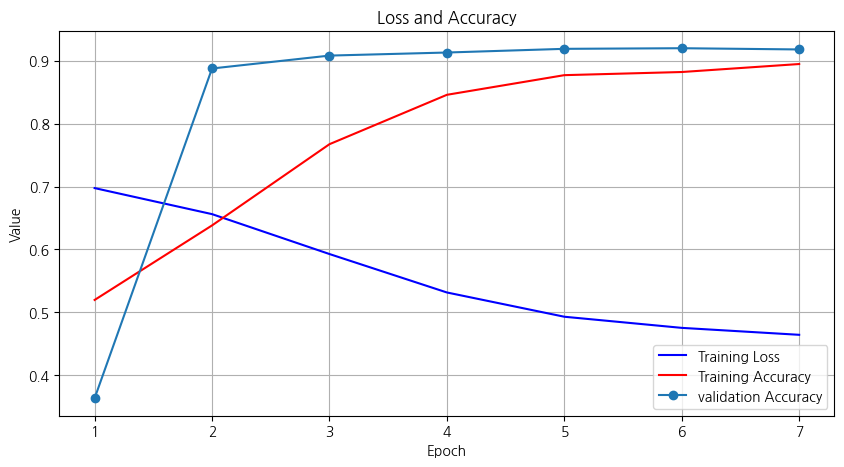

In [69]:
plt.figure(figsize=(10, 5))

# x축 데이터 생성 (1부터 에폭 수까지의 정수)
epochs = range(1, len(train_losses) + 1)

# 그래프 그리기
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.plot(epochs, train_accs, 'r-', label='Training Accuracy')
plt.plot(epochs, val_accs,'o-', label='validation Accuracy')

# x축 정수만 표시
plt.xticks(epochs)

# 레이블 및 제목 설정
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## 모델 저장

In [70]:
import os
# 모델 저장하기
PATH = './model/'
if not os.path.exists(PATH):
    os.makedirs(PATH)

torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss_fn,
    'train_acc': train_accs,
    'val_acc': val_accs
}, PATH + 'classfilermodel.pt')

print("모델이 저장되었습니다.")


모델이 저장되었습니다.


# 실제 추론에 사용
---
실제 입력은 계약서 약관 내용이다.

먼저 계약서의 내용을 조항별로 나누고 전처리 과정을 거쳐 리스트로 만든다.

이후 각 조항을 분류 모델을 통해 위법한지 판단을 내린다.

## 실제 계약서 예시(유리/불리)

In [71]:
import os
import xml.etree.ElementTree as ET

# 경로 설정
유리_경로 = './019.법률,_규정_(판결서,_약관_등)_텍스트_분석_데이터/01.데이터/2.Validation/원천데이터_230510_add/VS_2.약관/2.Validation/원천데이터/VS_2.약관/01.유리'
불리_경로 = './019.법률,_규정_(판결서,_약관_등)_텍스트_분석_데이터/01.데이터/2.Validation/원천데이터_230510_add/VS_2.약관/2.Validation/원천데이터/VS_2.약관/02.불리'

# XML 파일에서 약관 내용 추출하는 함수
def extract_content(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    # CDATA 섹션 내의 텍스트 추출 
    content = root.find('.//cn').text.strip()
    return content

# 각 경로에서 첫 번째 XML 파일 찾기
유리_파일 = glob.glob(os.path.join(유리_경로, '*.xml'))[0]
불리_파일 = glob.glob(os.path.join(불리_경로, '*.xml'))[0]

# 약관 내용 추출 및 출력
print("=== 유리한 약관 내용 ===")
유리_내용 = extract_content(유리_파일)
print(유리_내용)

print("\n=== 불리한 약관 내용 ===") 
불리_내용 = extract_content(불리_파일)
print(불리_내용)

=== 유리한 약관 내용 ===
000

 
결혼정보서비스 표준약관 

본 약관은 공정거래위원회 표준약관 제10027호와 동일하게 작성되었습니다 

 

제1조(목적) 이 약관은 결혼정보회사(결혼정보업자, 이하 회사라 함)가 제공하는 결혼관련 정보

서비스(이하 서비스라 함)를 이용함에 있어 회사와 회원 사이의 권리․의무 및 책임사항을 규정함

을 목적으로 합니다. 

 

제2조 (정의) 

1 회원이라 함은 제3조에서 정한 가입절차에 따라 회사가 그 가입신청을 승낙하고 이 약관에 

따라 계약을 체결한 사람을 말합니다. 

2 소개라 함은 회사가 회원간에 결혼상대방을 구하기 위한 만남을 주선하는 것을 말합니다. 

3 교제라 함은 회사의 소개로 만난 회원이 2회 이상 계속하여 만나는 것을 말합니다. 

4 결혼관련 개인정보라 함은 학력, 직업, 병력 등 통상 결혼함에 있어 당사자 사이에 확인할 

필요가 있는 것으로 인정되는 개인정보를 말합니다. 

 

제3조 (회원가입) 

1 회원이 되려고 하는 사람은 결혼관련 개인정보를 회사에 제공한 후 회사가 정한 가입절차에 

따라 회원가입을 신청합니다. 

2 회사는 제1항과 같이 회원가입을 신청한 자 중 다음 각 호의 사항에 대한 심사를 실시하여 그 

적격여부를 판단합니다. 

1. 배우자(사실혼관계의 배우자 포함) 있는 자인지 여부의 확인 

2. 결혼관련 개인정보의 사실여부의 확인 

3 회사는 제2항의 심사결과 적격자로 인정한 신청자에 한하여 회원가입을 승낙하고, 이 약관에 

따라 계약을 체결합니다. 

 

제4조 (약관의 명시와 개정) 



1 회사는 계약 체결시 이 약관의 내용을 회원으로 가입하려는 자에게 설명하고, 회원이 요구할 

때에는 이 약관을 교부합니다. 

2 회사는 약관의규제에관한법률, 소비자보호법 등 관련법령을 위배하지 않는 범위에서 이 약관

을 개정할 수 있습니다. 

3 회사가 이 약관을 개정할 경우에는 적용일자 및 개정사유를 명시하여 현행약관과 함께 그 적

용일자 15일

### 1. 조항별로 분리한다.

In [72]:
# 조항별로 분리하는 함수 정의
def split_by_article(text):
    # '제 숫자 조' 패턴으로 분리
    
    # 조항 분리를 위한 정규식 패턴
    pattern = r'제\s*\d+\s*조'
    
    # 조항 시작 위치 찾기
    matches = list(re.finditer(pattern, text))
    
    articles = []
    
    # 각 조항별로 분리
    for i in range(len(matches)):
        start = matches[i].start()
        # 마지막 조항이면 문서 끝까지, 아니면 다음 조항 시작 전까지
        end = matches[i+1].start() if i < len(matches)-1 else len(text)
        article = text[start:end].strip()
        articles.append(article)
        
    return articles

# 유리/불리 약관 각각 조항별로 분리
유리_조항들 = split_by_article(유리_내용)
불리_조항들 = split_by_article(불리_내용)

print("=== 유리한 약관 조항별 분리 ===")
print(유리_조항들)
    
print("\n=== 불리한 약관 조항별 분리 ===")  
print(불리_조항들)

=== 유리한 약관 조항별 분리 ===
['제1조(목적) 이 약관은 결혼정보회사(결혼정보업자, 이하 회사라 함)가 제공하는 결혼관련 정보\n\n서비스(이하 서비스라 함)를 이용함에 있어 회사와 회원 사이의 권리․의무 및 책임사항을 규정함\n\n을 목적으로 합니다.', '제2조 (정의) \n\n1 회원이라 함은', '제3조에서 정한 가입절차에 따라 회사가 그 가입신청을 승낙하고 이 약관에 \n\n따라 계약을 체결한 사람을 말합니다. \n\n2 소개라 함은 회사가 회원간에 결혼상대방을 구하기 위한 만남을 주선하는 것을 말합니다. \n\n3 교제라 함은 회사의 소개로 만난 회원이 2회 이상 계속하여 만나는 것을 말합니다. \n\n4 결혼관련 개인정보라 함은 학력, 직업, 병력 등 통상 결혼함에 있어 당사자 사이에 확인할 \n\n필요가 있는 것으로 인정되는 개인정보를 말합니다.', '제3조 (회원가입) \n\n1 회원이 되려고 하는 사람은 결혼관련 개인정보를 회사에 제공한 후 회사가 정한 가입절차에 \n\n따라 회원가입을 신청합니다. \n\n2 회사는 제1항과 같이 회원가입을 신청한 자 중 다음 각 호의 사항에 대한 심사를 실시하여 그 \n\n적격여부를 판단합니다. \n\n1. 배우자(사실혼관계의 배우자 포함) 있는 자인지 여부의 확인 \n\n2. 결혼관련 개인정보의 사실여부의 확인 \n\n3 회사는 제2항의 심사결과 적격자로 인정한 신청자에 한하여 회원가입을 승낙하고, 이 약관에 \n\n따라 계약을 체결합니다.', '제4조 (약관의 명시와 개정) \n\n\n\n1 회사는 계약 체결시 이 약관의 내용을 회원으로 가입하려는 자에게 설명하고, 회원이 요구할 \n\n때에는 이 약관을 교부합니다. \n\n2 회사는 약관의규제에관한법률, 소비자보호법 등 관련법령을 위배하지 않는 범위에서 이 약관\n\n을 개정할 수 있습니다. \n\n3 회사가 이 약관을 개정할 경우에는 적용일자 및 개정사유를 명시하여 현행약관과 함께 그 적\n\n용일자 15일 이전부터 적용일자 전일까지', '

### 2. 각 조항마다 기본적인 전처리를 한다

In [73]:
# 조항 내용 전처리 함수 적용
# 유리한 약관 조항들 전처리
print("=== 유리한 약관 조항 전처리 결과 ===")
유리_조항들_정제 = [clean_clause(article) for article in 유리_조항들]
for i, article in enumerate(유리_조항들_정제):
    print(article)

# 불리한 약관 조항들 전처리  
print("\n=== 불리한 약관 조항 전처리 결과 ===")
불리_조항들_정제 = [clean_clause(article) for article in 불리_조항들]
for i, article in enumerate(불리_조항들_정제):
    print(article)

=== 유리한 약관 조항 전처리 결과 ===
(목적) 이 약관은 결혼정보회사(결혼정보업자, 이하 회사라 함)가 제공하는 결혼관련 정보 서비스(이하 서비스라 함)를 이용함에 있어 회사와 회원 사이의 권리․의무 및 책임사항을 규정함 을 목적으로 합니다.
(정의) 1 회원이라 함은
에서 정한 가입절차에 따라 회사가 그 가입신청을 승낙하고 이 약관에 따라 계약을 체결한 사람을 말합니다. 2 소개라 함은 회사가 회원간에 결혼상대방을 구하기 위한 만남을 주선하는 것을 말합니다. 3 교제라 함은 회사의 소개로 만난 회원이 2회 이상 계속하여 만나는 것을 말합니다. 4 결혼관련 개인정보라 함은 학력, 직업, 병력 등 통상 결혼함에 있어 당사자 사이에 확인할 필요가 있는 것으로 인정되는 개인정보를 말합니다.
(회원가입) 1 회원이 되려고 하는 사람은 결혼관련 개인정보를 회사에 제공한 후 회사가 정한 가입절차에 따라 회원가입을 신청합니다. 2 회사는 제1항과 같이 회원가입을 신청한 자 중 다음 각 호의 사항에 대한 심사를 실시하여 그 적격여부를 판단합니다. 배우자(사실혼관계의 배우자 포함) 있는 자인지 여부의 확인 결혼관련 개인정보의 사실여부의 확인 3 회사는 제2항의 심사결과 적격자로 인정한 신청자에 한하여 회원가입을 승낙하고, 이 약관에 따라 계약을 체결합니다.
(약관의 명시와 개정) 1 회사는 계약 체결시 이 약관의 내용을 회원으로 가입하려는 자에게 설명하고, 회원이 요구할 때에는 이 약관을 교부합니다. 2 회사는 약관의규제에관한법률, 소비자보호법 등 관련법령을 위배하지 않는 범위에서 이 약관 을 개정할 수 있습니다. 3 회사가 이 약관을 개정할 경우에는 적용일자 및 개정사유를 명시하여 현행약관과 함께 그 적 용일자 15일 이전부터 적용일자 전일까지
의 방법으로 예고합니다. 4 회사가 약관을 개정할 경우에는 그 개정약관은 그 적용일자 이후에 체결되는 계약에만 적용되 고 그 이전에 이미 체결된 계약에 대해서는 개정전의 약관조항이 그대로 적용됩니다. 다만, 이미 계약을 체결한

### 3.tsv 형태로 변환 후 토큰화

In [74]:
# TSV 형식으로 변환 (레이블은 임시로 0으로 설정)
test_data0 = [[clause, "0"] for clause in 유리_조항들_정제]
test_data1 = [[clause, "0"] for clause in 불리_조항들_정제]

In [75]:
# BERTDataset 클래스를 이용하여 토큰화 후 텐서 데이터로 변환
test_tensor0 = BERTDataset(test_data0, 0, 1, tok, max_len, True, False)
test_tensor1 = BERTDataset(test_data1, 0, 1, tok, max_len, True, False)
#DataLoader 생성
test0_loader = torch.utils.data.DataLoader(test_tensor0, batch_size=batch_size, num_workers=4)
test1_loader = torch.utils.data.DataLoader(test_tensor1, batch_size=batch_size, num_workers=4)

### 4. 테스트 루프 정의 및 실행

In [76]:
def predict(model, device, test_loader):
    model.eval()  # 평가 모드로 설정
    predictions = []
    
    with torch.no_grad():  # 그래디언트 계산 비활성화
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_loader):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length = valid_length
            
            # 모델 예측
            out = model(token_ids, valid_length, segment_ids)
            
            # 예측값을 확률로 변환
            prob = F.softmax(out, dim=1)
            
            # 예측 결과 저장 (CPU로 변환하여 numpy 배열로)
            predictions.extend(prob.cpu().numpy())
    
    return np.array(predictions)

In [83]:
# 예측 실행(유리한 계약)
predictions = predict(model, device, test0_loader)

# 결과 정리
results = []
for i, (clause, pred) in enumerate(zip(유리_조항들_정제, predictions)):
    pred_label = "유리한 조항" if pred[1] > 0.5 else "불리한 조항"
    confidence = max(pred[0], pred[1])
    
    results.append({
        "조항번호": i+1,
        "조항내용": clause[:50] + "...",  # 앞부분 50자만 표시
        "예측결과": pred_label,
        "신뢰도": f"{confidence:.2%}"
    })

# 결과를 데이터프레임으로 변환하여 출력
result_df = pd.DataFrame(results)
result_df

,조항번호,조항내용,예측결과,신뢰도
0,1,"(목적) 이 약관은 결혼정보회사(결혼정보업자, 이하 회사라 함)가 제공하는 결혼관련...",불리한 조항,62.41%
1,2,(정의) 1 회원이라 함은...,유리한 조항,69.37%
2,3,에서 정한 가입절차에 따라 회사가 그 가입신청을 승낙하고 이 약관에 따라 계약을 체...,불리한 조항,64.61%
3,4,(회원가입) 1 회원이 되려고 하는 사람은 결혼관련 개인정보를 회사에 제공한 후 회...,유리한 조항,51.78%
4,5,(약관의 명시와 개정) 1 회사는 계약 체결시 이 약관의 내용을 회원으로 가입하려는...,불리한 조항,69.30%
5,6,의 방법으로 예고합니다. 4 회사가 약관을 개정할 경우에는 그 개정약관은 그 적용일...,불리한 조항,68.18%
6,7,(서비스의 제공) 1 회사는 회원에게 다음과 같은 서비스를 제공합니다. 회원에 대한...,불리한 조항,69.17%
7,8,(회원자격의 보유기간) 1 회원이 회사로부터...,유리한 조항,70.95%
8,9,"에서 정한 서비스를 제공받을 수 있는 기간은 계약체결일로부터 1년 입니다. 다만, ...",불리한 조항,61.25%
9,10,제1항에서 정한 횟수의 소개를 다한 경우에는 그 기간이 종료된 것으 로 봅니다. 2...,불리한 조항,59.52%


In [80]:
# 예측 실행(불리한 계약)
predictions = predict(model, device, test1_loader)

# 결과 정리
results = []
for i, (clause, pred) in enumerate(zip(불리_조항들_정제, predictions)):
    pred_label = "유리한 조항" if pred[1] > 0.5 else "불리한 조항"
    confidence = max(pred[0], pred[1])
    
    results.append({
        "조항번호": i+1,
        "조항내용": clause[:50] + "...",  # 앞부분 50자만 표시
        "예측결과": pred_label,
        "신뢰도": f"{confidence:.2%}"
    })

# 결과를 데이터프레임으로 변환하여 출력
result_df = pd.DataFrame(results)
result_df

,조항번호,조항내용,예측결과,신뢰도
0,1,(목 적)노인성질환 등으로 혼자서 일상생활을 하기 어려운 노인(장기요양급여수급자)에...,불리한 조항,56.15%
1,2,"(기본원칙) 갑 은 을 이 사업 성공화를 위한 최대한의 지원을 하고, 을 은 동사업...",유리한 조항,72.66%
2,3,(입소 이용로 납부) 갑의 입소당월 이용료는 에 납부하기로 한다. 입소 당월 이후 ...,유리한 조항,73.10%
3,4,( 계약자 의무 ) 갑의 의무 월 이용료 납부 시설의 건전한 생활분위기 조성에 협조...,유리한 조항,68.73%
4,5,(계약해지요건) 갑의 해지 갑과 병은 의사에 따라 자유롭게 퇴소를 결정할 수 있으며...,유리한 조항,72.54%
5,6,"제6항에 의거하여 이에 대한 사항을 을에게 통지하여야 한다. 다만, 부득이한 경우에...",유리한 조항,70.44%
6,7,( 퇴소 ) 을은...,유리한 조항,67.98%
7,8,항의 규정에 의한 계약해지 요건 시 이에 대한 증빙서류와 함께 계약해지 의사를 갑에...,유리한 조항,73.18%
8,9,( 입소물품 ) 갑은 시설입소 시 개인물품을 을과 협의하여 반입할 수 있다....,유리한 조항,70.13%
9,10,"( 면회 및 외출,외박 ) 갑의 면회시간은 매일 09시부터 21시까지로 한다 (단 ...",불리한 조항,51.55%


# 느낀점 및 부족한 점
실제의 계약서의 약관으로 내가 만든 분류기를 돌려보니 훈련시 나왔던 성능과 비슷한 결과가 나오지는 않았다. 
학습에 들어간 데이터는 유리란 조항과 불리한 조항으로만 구성되어있지만, 사실 현실 세계에는 유/불리를 명확히 나눌 수 없는 조항들이 더 많기 때문 이라고 생각한다.
또한 법률적 이해관계가 단순히 단어만 가지고 판단하가엔 더 복잡다는 것을 느꼈다. 처음에 구상은 를 판례 데이터를 학습해 판결을 예상하는 모델을 구상하다 이원분류가 더 쉬울 것 같다 생각하여 이 주제 선택하였는데, 생각보다 단순하지 않아 어려울이 있었다.

특히 기존BERT모델이 많이 응용되는 분야인 감정 분석의 경우 모델이 분류하기 전 사람이 판단하였을 때 명백히 구분이 되지만 이번 법률적 내용의 경우 사람이 읽어도 유불리에 대해 명확히 구분하기 어려워 한계가 있다고 느꼈다. 

만약  pu자원과 시간이 더많다면 다른 구조의 여러 모델과 방식으로 여러번 더 시도를 해보고싶다.

단순히 자연어 처리 기술이 아닌 COT와 같은 프롬프트 엔지니어링 기법을 이용해 수많은 법률 내용을 학습시킨다면 더 좋은 성느을 낼 수 있을거라는 생각이 든다.   